# DATA 6550 Project #2
_Isaiah Osborne_

## Overview

I'm going to try and _accurately_ visualize survival rates across different genders for the Titanic.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

In [4]:
titanic = pd.read_csv("../../Data/titanic.csv")

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


We're going to try to look at the difference between survival rates for men and women. I'm going to try and break it down across age and whether these people traveled by themselves.

## Data Preparation

In [ ]:
firstClassMen = titanic[(titanic["who"] == "man") & (titanic["class"] == "First")][
    "survived"
].mean()
thirdClassMen = titanic[(titanic["who"] == "man") & (titanic["class"] == "Third")][
    "survived"
].mean()

survivalIncreaseRichMen = firstClassMen / thirdClassMen

In [303]:
survivalIncreaseRichMen

2.9628482972136228

In [ ]:
survivalRateChildren = titanic[
    (titanic["who"] == "child") & (titanic["class"] == "Second")
]["survived"].mean()

In [361]:
firstClassWomen = titanic[(titanic["who"] == "woman") & (titanic["class"] == "First")][
    "survived"
].mean()
thirdClassWomen = titanic[(titanic["who"] == "woman") & (titanic["class"] == "Third")][
    "survived"
].mean()

survivalDecreasePoorWomen = thirdClassWomen / firstClassWomen

In [362]:
survivalDecreasePoorWomen

0.5022669032130889

In [396]:
classes = ["First", "Second", "Third"]

### Setup the Figure

In [365]:
# repeat our annotation
def sideAnnotation(figure, firstLine, callout, finalLine, calloutColor, y, x):
    figure.text(
        x,
        y + 0.04,
        firstLine,
        ha="center",
        va="center",
        size=15,
        style="italic",
    )

    figure.text(
        x,
        y,
        callout,
        ha="center",
        va="center",
        size=35,
        fontweight="bold",
        color=calloutColor,
    )

    figure.text(
        x,
        y - 0.04,
        finalLine,
        ha="center",
        va="center",
        size=15,
        style="italic",
    )

In [397]:
import matplotlib.ticker as mtick

C:\Users\IMOsb\AppData\Local\Temp\ipykernel_31916\2509876924.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels([f"{x:.0%}" for x in vals], size=12)


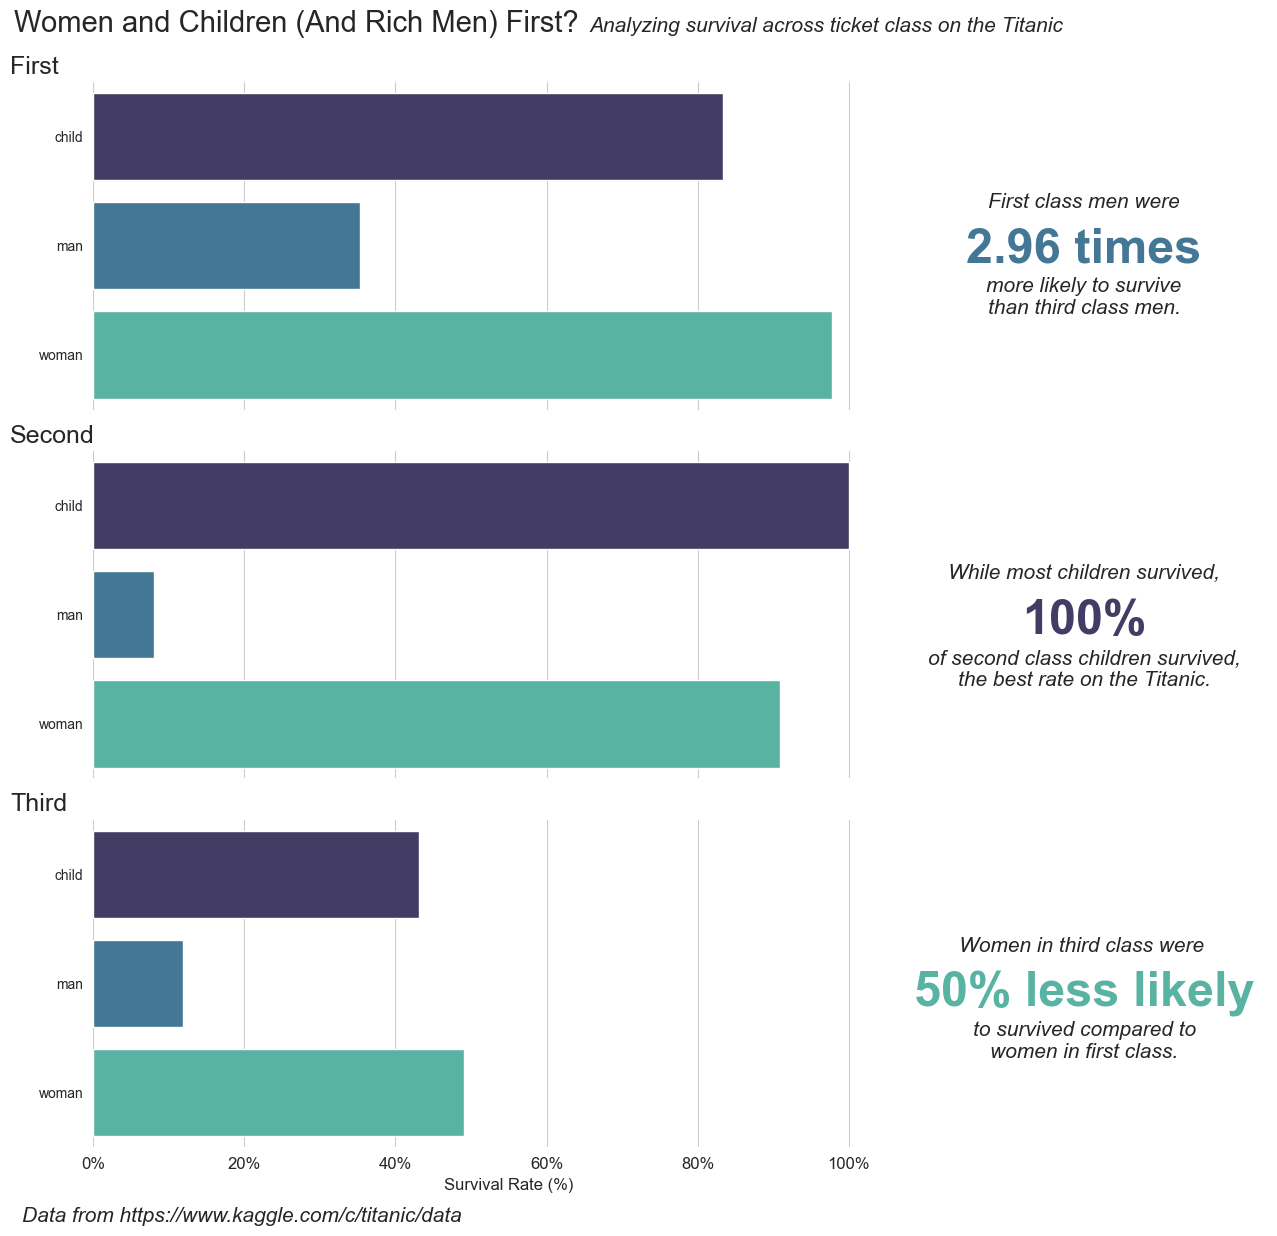

In [ ]:
figure, axis = plt.subplots(nrows=3)
figure.set_size_inches(9, 12)

# plt.tick_params(top='off', bottom='off', left='off', right="off")
figure.tight_layout()
for i in range(3):
    # filter the data (and sort so it's always consistent)
    filteredData = titanic[titanic["pclass"] == i + 1].sort_values("who")

    graph = sns.barplot(
        data=filteredData,
        x="survived",
        y="who",
        hue="who",
        ax=axis[i],
        errorbar=None,
        palette="mako",
    )

    graph.set_xlim((0, 1.1))

    graph.set_frame_on(False)
    graph.set_ylabel("")

    if i != 2:
        graph.set_xticklabels([])
        graph.set_xlabel("")
    else:
        # format them to be percentages
        # from here: https://stackoverflow.com/a/31357733
        vals = graph.get_xticks()
        graph.set_xticklabels([f"{x:.0%}" for x in vals], size=12)
        graph.set_xlabel("Survival Rate (%)", size=12)

    graph.set_title(classes[i], loc="left", x=-0.1, size=18)


figure.subplots_adjust(top=0.92)
# https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots
figure.suptitle("Women and Children (And Rich Men) First?", size=21, x=0.275)

# fancy subtitle!
figure.text(
    0.6,
    0.962,
    "Analyzing survival across ticket class on the Titanic",
    size=15,
    style="italic",
)

sideAnnotation(
    figure=figure,
    firstLine="First class men were",
    callout=f"{survivalIncreaseRichMen:.2f} times",
    finalLine="more likely to survive\nthan third class men.",
    calloutColor="#437795",
    y=0.78,
    x=1.15,
)

sideAnnotation(
    figure=figure,
    firstLine="While most children survived,",
    callout=f"{survivalRateChildren:.0%}",
    finalLine="of second class children survived,\nthe best rate on the Titanic.",
    calloutColor="#433c64",
    y=0.47,
    x=1.15,
)

# callout out women values
sideAnnotation(
    figure=figure,
    firstLine="Women in third class were ",
    callout=f"{survivalDecreasePoorWomen:.0%} less likely",
    finalLine="to survived compared to\nwomen in first class.",
    calloutColor="#59b3a3",
    y=0.16,
    x=1.15,
)

# I know it's icky, but it stretches out the figure for us...
figure.text(
    1.35,
    0.5,
    " ",
)

figure.text(
    -0.03,
    -0.03,
    "Data from https://www.kaggle.com/c/titanic/data",
    style="italic",
    size=15,
)

plt.show()